决策树是一种在分类与回归中都有非常广泛应用的算法，它的原理是通过对一系列问题进行if/else的推导，最终实现决策。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import tree,datasets
from sklearn.model_selection import train_test_split
wine=datasets.load_wine()
X=wine.data[:,:2]#选取了数据集中样本的前两个特征
y=wine.target
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [2]:
#设定决策树分类器最大深度为1
clf = tree.DecisionTreeClassifier(max_depth=1)
#拟合训练数据集
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

Text(0.5, 1.0, 'Classifier:(max_depth=1)')

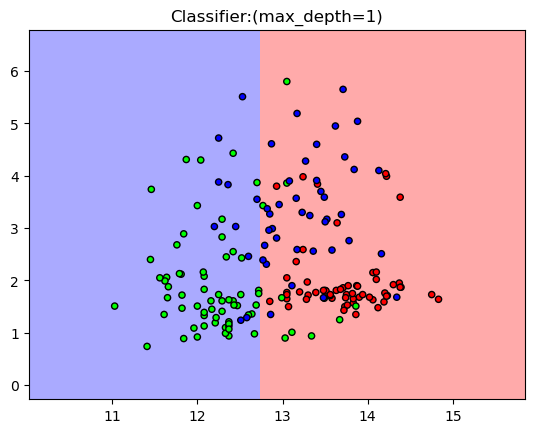

In [3]:
#定义图像中分区的颜色和散点的颜色
cmap_light=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold=ListedColormap(['#FF0000','#00FF00','#0000FF'])
#限定横轴与纵轴的最大值
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
#用不同背景颜色表示不同分类
xx,yy=np.meshgrid(np.arange(x_min,x_max,.02),
                  np.arange(y_min,y_max,.02))
z=clf.predict(np.c_[(xx.ravel(),yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=cmap_light)
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold,edgecolor='k',s=20)
plt.xlim=(xx.min(),xx.max())
plt.ylim=(yy.min(),yy.max())
plt.title('Classifier:(max_depth=1)')
#很显然，最大深度等于1时分类器的表现肯定不会太好，分类器只分了两类。

Text(0.5, 1.0, 'Classifier:(max_depth=3)')

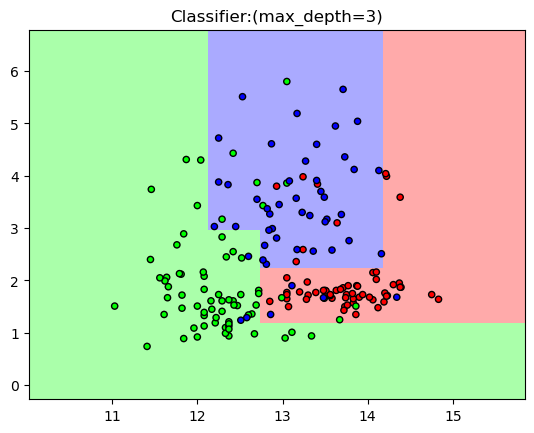

In [4]:
#设定决策树最大深度为3
clf2 = tree.DecisionTreeClassifier(max_depth=3)
#重新拟合数据
clf2.fit(X_train,y_train)
#定义图像中分区的颜色和散点的颜色
cmap_light=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold=ListedColormap(['#FF0000','#00FF00','#0000FF'])
#限定横轴与纵轴的最大值
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
#用不同背景颜色表示不同分类
xx,yy=np.meshgrid(np.arange(x_min,x_max,.02),
                  np.arange(y_min,y_max,.02))
z=clf2.predict(np.c_[(xx.ravel(),yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=cmap_light)
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold,edgecolor='k',s=20)
plt.xlim=(xx.min(),xx.max())
plt.ylim=(yy.min(),yy.max())
plt.title('Classifier:(max_depth=3)')

Text(0.5, 1.0, 'Classifier:(max_depth=5)')

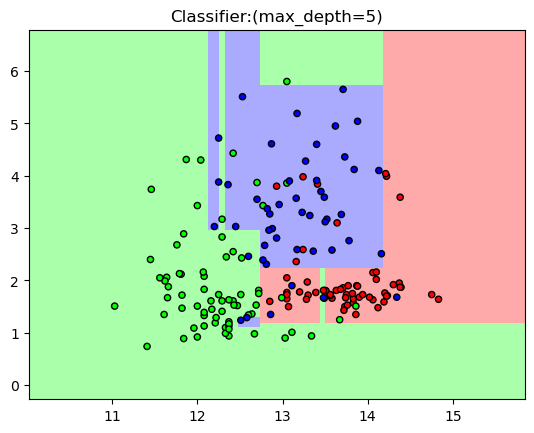

In [5]:
#设定决策树最大深度为5
clf3 = tree.DecisionTreeClassifier(max_depth=5)
#重新拟合数据
clf3.fit(X_train,y_train)
#定义图像中分区的颜色和散点的颜色
cmap_light=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold=ListedColormap(['#FF0000','#00FF00','#0000FF'])
#限定横轴与纵轴的最大值
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
#用不同背景颜色表示不同分类
xx,yy=np.meshgrid(np.arange(x_min,x_max,.02),
                  np.arange(y_min,y_max,.02))
z=clf3.predict(np.c_[(xx.ravel(),yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=cmap_light)
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold,edgecolor='k',s=20)
plt.xlim=(xx.min(),xx.max())
plt.ylim=(yy.min(),yy.max())
plt.title('Classifier:(max_depth=5)')

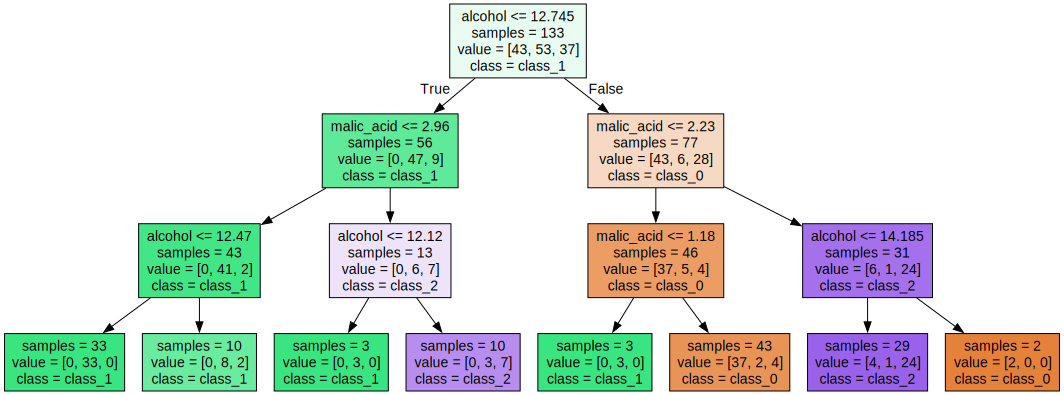

In [6]:
#graphviz只是帮助我们演示决策树的工作过程，对于读者来说，安装它并不是必须的。
import graphviz
#导入决策树中输出graphviz的接口
from sklearn.tree import export_graphviz
export_graphviz(clf2,out_file='wine.dot',class_names=wine.target_names,
               feature_names=wine.feature_names[:2],impurity=False,filled=True)
with open('wine.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

先从决策树的根部开始看起，第一个条件是酒精含量小于或等于12.745，samples = 133指在根节点上，有133个样本。Value =[41, 53, 39]是指有41个样本属于class_0，53个样本属于class_1，其余39个样本属于class_2。接下来我们跟着树枝一起前进，在酒精度小于或等于12.745这个条件为True的情况下，决策树判断分类为class_1，如果是False，则判断为class_0，这样到下一层，判断为class_1的样本共有53个，而判断为class_0的样本则有77个，而再下一层则对酒的苹果酸含量进行判断，进一步对样本进行分类。左边class_1的分支的判断条件是苹果酸含量小于或等于2.445，如果为True，则再判断酒精含量是否小于或等于12.49，如果为False则判断酒精含量是否低于12.12，依此类推，直到将样本全部放进3个分类当中。
相比其他算法，决策树有一个非常大的优势，就是可以很容易地将模型进行可视化。
另外，由于决策树算法对每个样本特征进行单独处理，因此并不需要对数据进行转换。
如果使用决策树算法的话，我们几乎不需要对数据进行预处理。这也是决策树算法的一个优点。当然，决策树算法也有它的不足之处——即便我们在建模的时候可以使用类似max_depth或是max_leaf_nodes等参数来对决策树进行预剪枝处理，但它还是不可避免会出现过拟合的问题，也就让模型的泛化性能大打折扣了。为了避免过拟合的问题出现，可以使用集合学习的方法，也就是我们下面要介绍的——随机森林算法。
随机森林有的时候也被称为是随机决策森林，是一种集合学习方法，既可以用于分类，也可以用于回归。而所谓集合学习算法，其实就是把多个机器学习算法综合在一起，制造出一个更加大模型的意思。
因为随机森林是把不同的几棵决策树打包到一起，每棵树的参数都不相同，然后我们把每棵树预测的结果取平均值，这样即可以保留决策树们的工作成效，又可以降低过拟合的风险。

In [9]:
from sklearn.ensemble import RandomForestClassifier
wine=datasets.load_wine()
X=wine.data[:,:2]
y=wine.target
X_train,X_test,y_train,y_test=train_test_split(X,y)
#设定随机森林中有六棵树
forest=RandomForestClassifier(n_estimators=6,random_state=3)
forest.fit(X_test,y_test)

RandomForestClassifier(n_estimators=6, random_state=3)

首先是bootstrap参数，代表的是bootstrap sample，也就是“有放回抽样”的意思，指每次从样本空间中可以重复抽取同一个样本（因为样本在第一次被抽取之后又被放回去了），形象一点来说，如原始样本是['苹果'，'西瓜'，'香蕉'，'桃子']，那么经过bootstrap sample重构的样本就可能是['西瓜'，'西瓜'，'香蕉'，'桃子']，还有可能是['苹果'，'香蕉'，'桃子'，'桃子']。Bootstrap sample生成的数据集和原始数据集在数据量上是完全一样的，但由于进行了重复采样，因此其中有一些数据点会丢失。
为什么要生成bootstrap sample数据集。这是因为通过重新生成数据集，可以让随机森林中的每一棵决策树在构建的时候，会彼此之间有些差异。再加上每棵树的节点都会去选择不同的样本特征，经过这两步动作之后，可以完全肯定随机森林中的每棵树都不一样，这也符合我们使用随机森林的初衷。
接下来模型会基于新数据集建立一棵决策树，在随机森林当中，算法不会让每棵决策树都生成最佳的节点，而是会在每个节点上随机地选择一些样本特征，然后让其中之一有最好的拟合表现。在这里，我们是用max_features这个参数来控制所选择的特征数量最大值的，在不进行指定的情况下，随机森林默认自动选择最大特征数量。
而关于max_features参数的设置，还是有些讲究的。假如把max_features设置为样本全部的特征数n_features就意味着模型会在全部特征中进行筛选，这样在特征选择这一步，就没有随机性可言了。而如果把max_features的值设为1，就意味着模型在数据特征上完全没有选择的余地，只能去寻找这1个被随机选出来的特征向量的阈值了。所以说，max_features的取值越高，随机森林里的每一棵决策树就会“长得更像”，它们因为有更多的不同特征可以选择，也就会更容易拟合数据；反之，如果max_features取值越低，就会迫使每棵决策树的样子更加不同，而且因为特征太少，决策树们不得不制造更多节点来拟合数据。
另外还有一个要强调的参数，是n_estimators，这个参数控制的是随机森林中决策树的数量。在随机森林构建完成之后，每棵决策树都会单独进行预测。如果是用来进行回归分析的话，随机森林会把所有决策树预测的值取平均数；如果是用来进行分类的话，在森林内部会进行“投票”，每棵树预测出数据类别的概率，比如其中一棵树说，“这瓶酒80%属于class_1”，另外一棵树说，“这瓶酒60%属于class_2”，随机森林会把这些概率取平均值，然后把样本放入概率最高的分类当中。

Text(0.5, 1.0, 'Classifier:RandomForest')

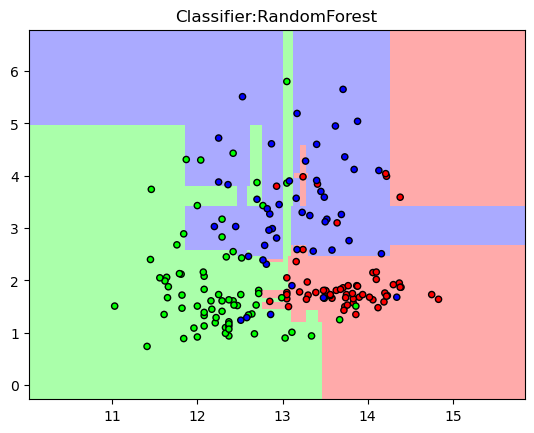

In [10]:
#定义图像中分区的颜色和散点的颜色
cmap_light=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold=ListedColormap(['#FF0000','#00FF00','#0000FF'])
#限定横轴与纵轴的最大值
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
#用不同背景颜色表示不同分类
xx,yy=np.meshgrid(np.arange(x_min,x_max,.02),
                  np.arange(y_min,y_max,.02))
z=forest.predict(np.c_[(xx.ravel(),yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=cmap_light)
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold,edgecolor='k',s=20)
plt.xlim=(xx.min(),xx.max())
plt.ylim=(yy.min(),yy.max())
plt.title('Classifier:RandomForest')

还有，随机森林算法支持并行处理。对于超大数据集来说，随机森林会比较耗时（毕竟要建立很多决策树），不过我们可以用多进程并行处理的方式来解决这个问题。实现方式是调节随机森林的n_ jobs参数，记得把n_ jobs参数数值设为和CPU内核数一致，比如你的CPU内核数是2，那么n_ jobs参数设为3或者更大是没有意义的。当然如果你搞不清楚自己的CPU到底就多少内核，可以设置n_ jobs = -1，这样随机森林会使用CPU的全部内核，速度就会极大提升了。
不过，虽然随机森林有诸多优点，尤其是并行处理功能在处理超大数据集时能提供良好的性能表现。但它也有不足，例如，对于超高维数据集、稀疏数据集等来说，随机森林就有点捉襟见肘了，在这种情况下，线性模型要比随机森林的表现更好一些。还有，随机森林相对更消耗内存，速度也比线性模型要慢，所以如果程序希望更节省内存和时间的话，建议还是选择线性模型。
决策树和随机森林还有一个特别“体贴”的功能，就是可以帮助用户在数据集中对数据特征的重要性进行判断。这样一来，我们还可以通过这两个算法对高维数据集进行分析，在诸多特征中保留最重要的几个，这样也便于我们对数据进行降维处理。